<a href="https://colab.research.google.com/github/Thanveerahamed-14/mlproject/blob/main/basic_model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
data = pd.read_csv("/diabetes.csv", encoding="ISO-8859-1")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = data.drop("Outcome", axis=1)  # Assuming "Outcome" is the target column
y = data["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
num_features_to_select = 5
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

In [ ]:
rf_model.fit(X_train_selected, y_train)
dt_model.fit(X_train_selected, y_train)
knn_model.fit(X_train_selected, y_train)
nb_model.fit(X_train_selected, y_train)
lr_model.fit(X_train_selected, y_train)
svm_model.fit(X_train_selected, y_train)

SVC()

In [ ]:
rf_pred = rf_model.predict(X_test_selected)
dt_pred = dt_model.predict(X_test_selected)
knn_pred = knn_model.predict(X_test_selected)
nb_pred = nb_model.predict(X_test_selected)
lr_pred = lr_model.predict(X_test_selected)
svm_pred = svm_model.predict(X_test_selected)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)

Random Forest Accuracy: 0.7662337662337663
Decision Tree Accuracy: 0.7012987012987013
K-Nearest Neighbors Accuracy: 0.7337662337662337
Naive Bayes Accuracy: 0.7532467532467533
Logistic Regression Accuracy: 0.7532467532467533
Support Vector Machine Accuracy: 0.7662337662337663


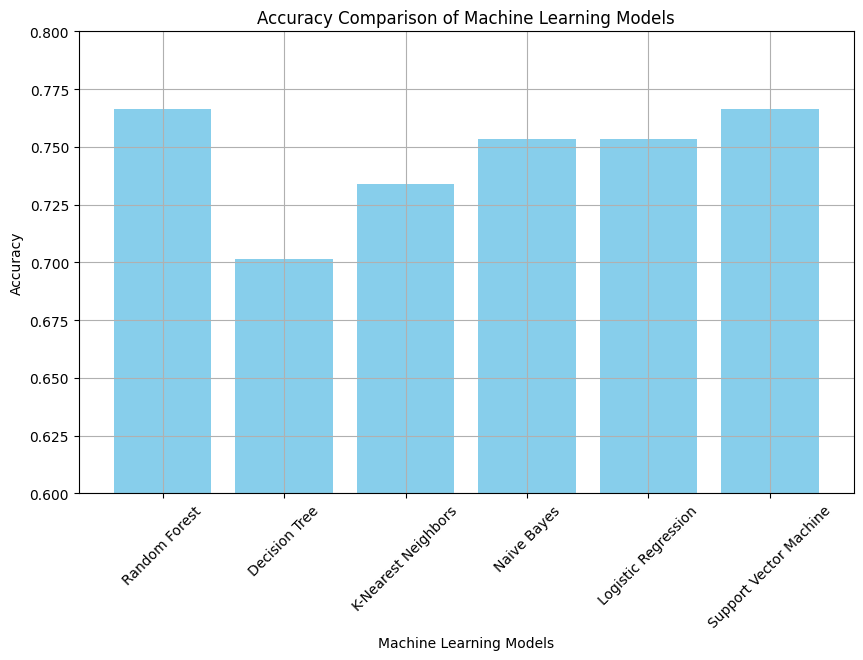

In [ ]:
# List of model names for the x-axis
model_names = ["Random Forest", "Decision Tree", "K-Nearest Neighbors", "Naive Bayes", "Logistic Regression", "Support Vector Machine"]
# List of accuracy scores for the y-axis
accuracy_scores = [rf_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, svm_accuracy]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylim(0.6, 0.8)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.show()

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = data.iloc[:,:-1]
y = data["Outcome"]
sc=StandardScaler()
x_scaled = sc.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 1)

In [ ]:
model = Sequential()

model.add(Dense(32,activation = "relu",input_dim = 8))
model.add(Dense(1,activation = "sigmoid"))

model.summary()
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ['accuracy'])
hist = model.fit(x_train,y_train,batch_size = 32,epochs = 100,validation_data = (x_test,y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6628 - loss: 0.6692 - val_accuracy: 0.6429 - val_loss: 0.6691
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6570 - loss: 0.6221 - val_accuracy: 0.6494 - val_loss: 0.6198
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6705 - loss: 0.5743 - val_accuracy: 0.6688 - val_loss: 0.5837
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6656 - loss: 0.5723 - val_accuracy: 0.6948 - val_loss: 0.5558
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7057 - loss: 0.5304 - val_accuracy: 0.7013 - val_loss: 0.5361
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7259 - loss: 0.5245 - val_accuracy: 0.7338 - val_loss: 0.5227
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7328 - loss: 0.5156 - val_accuracy: 0.7597 - val_loss: 0.5098
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.5138 - val_accuracy: 0.7792 - 